In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
y = df.Outcome
X = df.drop('Outcome', axis=1)

In [ ]:
y.shape

(768,)

In [ ]:
X.shape

(768, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [ ]:
X = np.append(np.ones([len(X),1]), X, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
theta = np.zeros(X.shape[1])
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def cost(X, y, theta):
  m = len(y)
  z = np.dot(X, theta)
  h = sigmoid(z)
  J = (-1/m) * np.sum( y*np.log(h) + (1-y)*np.log(1-h) ) 
  return J

In [ ]:
def gradient_descent(X, y, theta, alpha, iter):
    m = len(y)
    cost_history = np.zeros((iter,1))

    for i in range(iter):
        h = sigmoid(np.dot(X,theta))
        theta = theta - (alpha/m) * np.dot(X.T,(h - y))
        cost_history[i] = cost(X, y, theta)

    return (cost_history, theta)

In [ ]:
def predict(X, theta):
  z = np.dot(X,theta)
  h = sigmoid(z)
  y_pred = [1 if y>=0.5 else 0 for y in h]
  return y_pred

In [ ]:
costs, theta = gradient_descent(X_train, y_train, theta, 0.01, 10000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_cost_curve(costs):
  plt.plot(costs)
  plt.ylabel('Cost')
  plt.xlabel('No. of Iterations')
  plt.title('Gradient Descent')

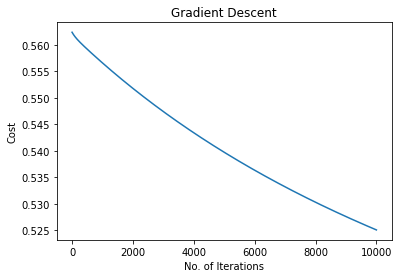

In [ ]:
plot_cost_curve(costs)

In [ ]:
y_pred = predict(X_test, theta)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.7857142857142857

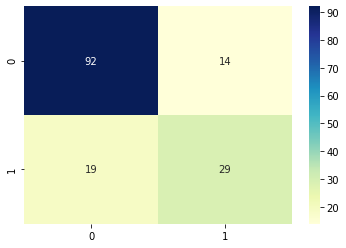

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap="YlGnBu")

0.7734375

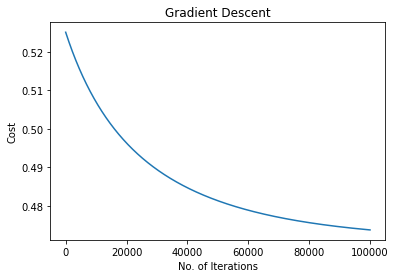

In [ ]:
costs, theta = gradient_descent(X_train, y_train, theta, 0.01, 100000)
plot_cost_curve(costs)
y_pred = predict(X_test, theta)
accuracy_score(y_test,y_pred)